In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import prophet
from prophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('data.csv')

df.tail(5)

,Date,Temp
33862,2023-01-02 23:35:38,26.95
33863,2023-01-02 23:36:42,25.94
33864,2023-01-02 23:37:47,25.95
33865,2023-01-02 23:38:55,25.91
33866,2023-01-02 23:40:00,25.90


In [ ]:
df.dtypes

Date     object
Temp    float64
dtype: object

In [ ]:
df['Date'] = pd.DatetimeIndex(df['Date'])
df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [ ]:
df = df.rename(columns={'Date': 'ds',
                        'Temp': 'y'})

df.head(5)

,ds,y
0,2022-12-15 10:43:17,37.92
1,2022-12-15 10:43:36,37.96
2,2022-12-15 10:43:51,37.97
3,2022-12-15 10:44:06,37.94
4,2022-12-15 10:44:23,37.97


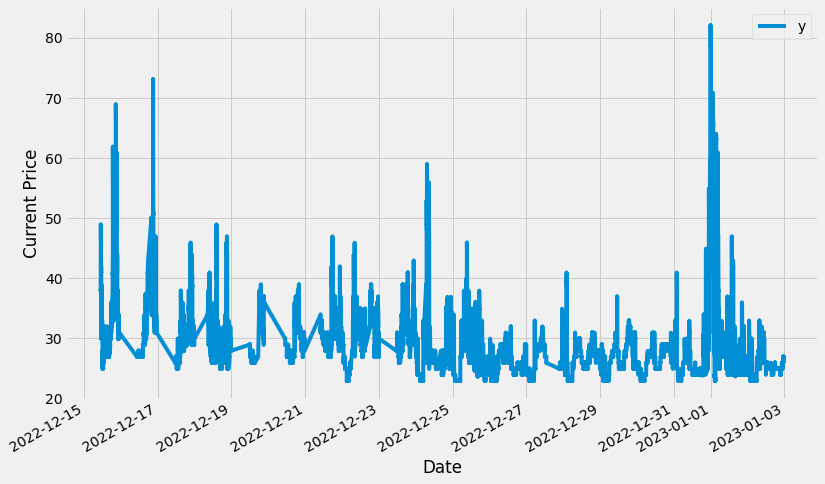

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Current Price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
model = Prophet(interval_width=0.95)

In [ ]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu7p7gjr/9ll9fk6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu7p7gjr/2ddq36ze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86695', 'data', 'file=/tmp/tmpxu7p7gjr/9ll9fk6q.json', 'init=/tmp/tmpxu7p7gjr/2ddq36ze.json', 'output', 'file=/tmp/tmpxu7p7gjr/prophet_model_qpxaxfl/prophet_model-20230103044156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:41:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:42:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Creates new df that will store the predictions
future_dates = model.make_future_dataframe(periods=1000, freq='20s')
future_dates.tail()

,ds
34862,2023-01-03 05:12:00
34863,2023-01-03 05:12:20
34864,2023-01-03 05:12:40
34865,2023-01-03 05:13:00
34866,2023-01-03 05:13:20


In [ ]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34862,2023-01-03 05:12:00,22.675437,13.519895,31.958374
34863,2023-01-03 05:12:20,22.686012,13.255771,31.939552
34864,2023-01-03 05:12:40,22.696640,13.430077,31.526528
34865,2023-01-03 05:13:00,22.707320,13.718474,31.304893
34866,2023-01-03 05:13:20,22.718051,13.621087,32.076836


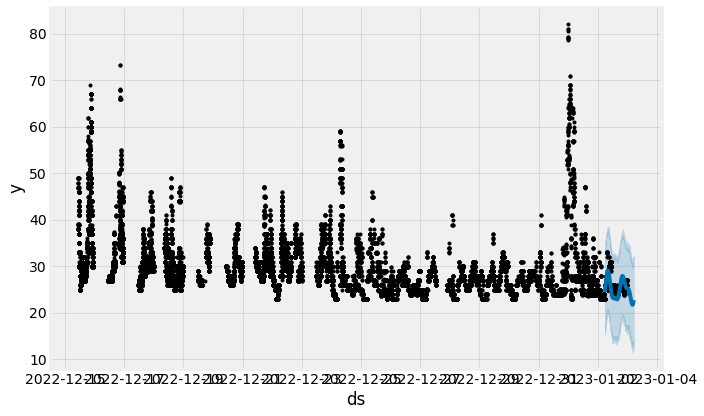

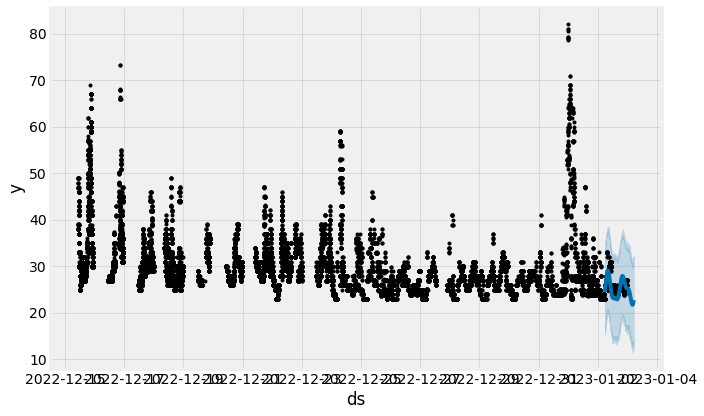

In [ ]:
model.plot(forecast[-2000:],
              uncertainty=True)

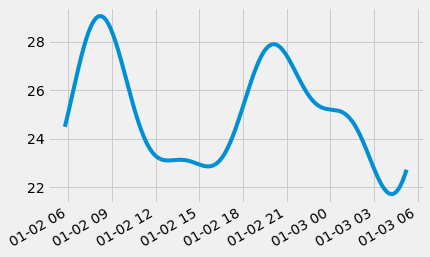

In [ ]:
fig, ax = plt.subplots()
ax.plot(forecast['ds'][-2000:], forecast['yhat'][-2000:])
fig.autofmt_xdate()
fig.show()

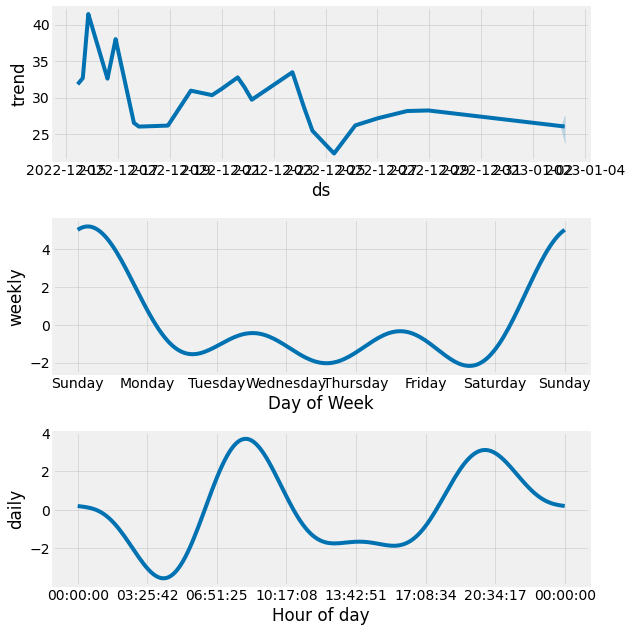

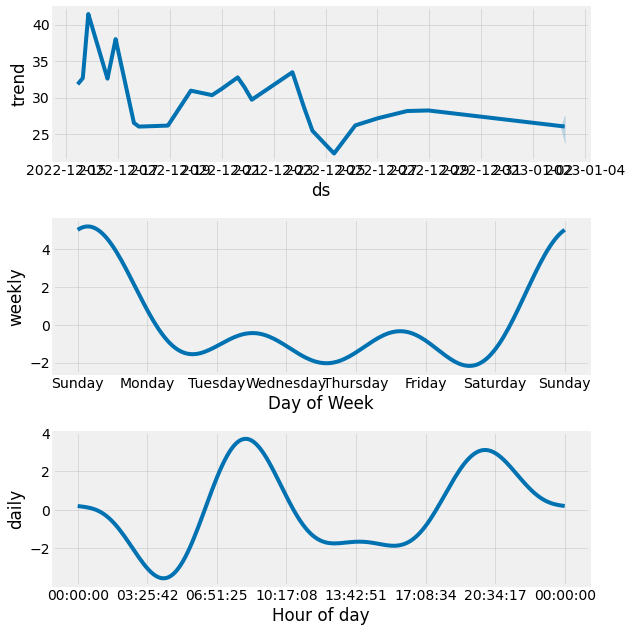

In [ ]:
model.plot_components(forecast)